In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../setigen/")
import setigen as stg
from astropy import units as u
import blimpy as bl

In [2]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)

In [10]:
import tables
dir(tables.file._open_files)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_handlers',
 '_name_mapping',
 'add',
 'close_all',
 'filenames',
 'get_handlers_by_name',
 'handlers',
 'remove']

In [20]:
tables.file._open_files.close_all()

In [22]:
import h5py

In [26]:
hFile = h5py.File(fil_fn)
print(hFile.__bool__())
hFile.close()

True


In [37]:
import gc
for obj in gc.get_objects():   # Browse through ALL objects
    if isinstance(obj, h5py.File):   # Just HDF5 files
        try:
            obj.close()
        except:
            pass # Was already closed

In [38]:
fil_fn = 'temp.h5'
frame.save_hdf5(fil_fn)

blimpy.waterfall INFO     Conversion time: 0.01sec


In [35]:
temp_frame = stg.Frame(waterfall=fil_fn)

In [4]:
f = stg.Frame(waterfall='../setigen/setigen/assets/sample.fil')
f.waterfall.header

{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 17.7875 hourangle>,
 'src_dej': <Angle -28.3831 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6663.99999987334,
 'foff': -1.3969838619232178e-06,
 'nchans': 1024,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 58465.717094907406,
 'tsamp': 1.431655765333332,
 'nifs': 1,
 'source_name': 'DIAG_SGR_B2',
 'rawdatafile': 'blc13_guppi_58465_61957_DIAG_SGR_B2_0066.0000.raw'}

In [4]:
fil_fn = 'temp.h5'
f.save_hdf5(fil_fn)

blimpy.waterfall INFO     Conversion time: 0.02sec


In [5]:
temp_frame = stg.Frame(waterfall=fil_fn)

In [6]:
temp_frame.header

{'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object),
 'az_start': 0.0,
 'data_type': 1,
 'fch1': 6095.214842353015,
 'foff': -2.7939677238464355e-06,
 'ibeam': -1,
 'machine_id': 20,
 'nbeams': 1,
 'nbits': 32,
 'nchans': 1024,
 'nifs': 1,
 'rawdatafile': 'Synthetic',
 'source_name': 'Synthetic',
 'src_dej': <Angle -28.3831 deg>,
 'src_raj': <Angle 17.7875 hourangle>,
 'telescope_id': 6,
 'tsamp': 18.25361108,
 'tstart': 58465.717094907406,
 'za_start': 0.0}

In [6]:
temp_frame.add_constant_signal(frame.get_frequency(256), 1, 1, 10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

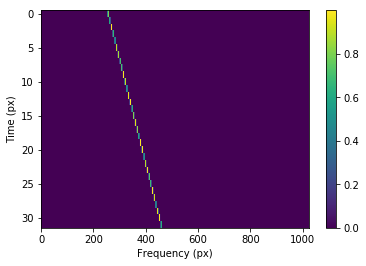

In [9]:
temp_frame.render()

In [11]:
h5_path = '/mnt_blpd7/datax/hard_linked_in_dl/gbl/spliced_blc0001020304050607_guppi_57557_47744_HIP3092_0005.gpuspec.0000.h5'
f = bl.Waterfall(h5_path)
f.header

blimpy.io.base_reader WARNING  Selection size of 19.25 GB, exceeding our size limit 1.00 GB. Instance created, header loaded, but data not loaded, please try another (t,v) selection.


{'DIMENSION_LABELS': array([b'frequency', b'feed_id', b'time'], dtype=object),
 'az_start': 0.0,
 'data_type': 1,
 'fch1': 1926.26953125,
 'foff': -2.7939677238464355e-06,
 'machine_id': 20,
 'nbits': 32,
 'nchans': 322961408,
 'nifs': 1,
 'source_name': 'HIP3092',
 'src_dej': <Angle 30.86055694 deg>,
 'src_raj': <Angle 0.6555 hourangle>,
 'telescope_id': 6,
 'tsamp': 18.253611008,
 'tstart': 57557.55259259259,
 'za_start': 0.0}

In [22]:
h5_path = '/mnt_blpd7/datax/hard_linked_in_dl/gbl/spliced_blc0001020304050607_guppi_57557_47744_HIP3092_0005.gpuspec.0000.h5'
gen = stg.split_waterfall_generator(h5_path, 1024,)

In [23]:
wf = next(gen)

blimpy.io.base_reader INFO     Skipping loading data ...


In [24]:
frame = stg.Frame(wf)

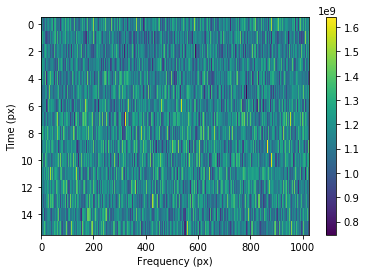

In [27]:
frame.render()

In [28]:
frame.save_fil(filename='test.fil')

blimpy.waterfall INFO     Conversion time: 0.00sec


In [18]:
f = stg.Frame(waterfall='../setigen/setigen/assets/sample.fil')
f.waterfall.header

{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 17.7875 hourangle>,
 'src_dej': <Angle -28.3831 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6663.99999987334,
 'foff': -1.3969838619232178e-06,
 'nchans': 1024,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 58465.717094907406,
 'tsamp': 1.431655765333332,
 'nifs': 1,
 'source_name': 'DIAG_SGR_B2',
 'rawdatafile': 'blc13_guppi_58465_61957_DIAG_SGR_B2_0066.0000.raw'}

In [19]:
frame.waterfall.header

{'DIMENSION_LABELS': array([b'frequency', b'feed_id', b'time'], dtype=object),
 'az_start': 0.0,
 'data_type': 1,
 'fch1': 1926.26953125,
 'foff': -2.7939677238464355e-06,
 'machine_id': 20,
 'nbits': 32,
 'nchans': 322961408,
 'nifs': 1,
 'source_name': 'HIP3092',
 'src_dej': <Angle 30.86055694 deg>,
 'src_raj': <Angle 0.6555 hourangle>,
 'telescope_id': 6,
 'tsamp': 18.253611008,
 'tstart': 57557.55259259259,
 'za_start': 0.0}

In [20]:
set(f.waterfall.header.keys()) - set(frame.waterfall.header.keys())

{'ibeam', 'nbeams', 'rawdatafile'}

In [28]:
frame.save_fil??

Signature: frame.save_fil(filename)
Source:   
    def save_fil(self, filename):
        """
        Save frame data as a filterbank file (.fil).
        """
        self._update_waterfall()
        self._encode_bytestrings()
        self.waterfall.write_to_fil(filename)
        self._decode_bytestrings()
File:      /mnt_home/bryanb/setigen/setigen/frame.py
Type:      method


In [21]:
frame._encode_bytestrings??

Signature: frame._encode_bytestrings()
Docstring: <no docstring>
Source:   
    def _encode_bytestrings(self):
        for key in ['source_name', 'rawdatafile']:
            # Some data don't have these keys to begin with
            if key in self.waterfall.header:
                if not isinstance(self.waterfall.header[key], bytes):
                    self.waterfall.header[key] = self.waterfall.header[key].encode()
File:      /mnt_home/bryanb/setigen/setigen/frame.py
Type:      method


In [10]:
del f.waterfall.header['rawdatafile']

In [11]:
f.waterfall.header

{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 17.7875 hourangle>,
 'src_dej': <Angle -28.3831 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6663.99999987334,
 'foff': -1.3969838619232178e-06,
 'nchans': 1024,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 58465.717094907406,
 'tsamp': 1.431655765333332,
 'nifs': 1,
 'source_name': 'DIAG_SGR_B2'}